## Numpy Reader

## Common Code

In [47]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import random

from amd.rocal.pipeline import Pipeline
from amd.rocal.plugin.generic import ROCALNumpyIterator
import amd.rocal.fn as fn
import amd.rocal.types as types
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Configuring rocAL pipeline

Configure the pipeline parameters as required by the user.

In [48]:
data_path = os.path.join(os.environ['ROCAL_DATA_PATH'], "npy")
rocal_cpu = True
batch_size = 10
one_hot_label = 0
num_threads = 1
path = "output_folder/numpy_reader/"
num_threads = 1
local_rank = 0
device_id = 0
world_size = 1
random_seed = random.SystemRandom().randint(0, 2**32 - 1)

## Defining and Running the Pipeline

In [49]:
pipeline = Pipeline(batch_size=batch_size, num_threads=num_threads, device_id=device_id, seed=random_seed, rocal_cpu=rocal_cpu)

Pipeline has been created succesfully
OK: loaded 125 kernels from libvx_rpp.so


In [50]:
with pipeline:
    numpy_reader_output = fn.readers.numpy(file_root=data_path, shard_id=local_rank, num_shards=world_size)
    pipeline.set_outputs(numpy_reader_output)

In [51]:
pipeline.build()
numpyIteratorPipeline = ROCALNumpyIterator(pipeline)

## Visualizing outputs
We have displayed the output of augmented images using imshow()

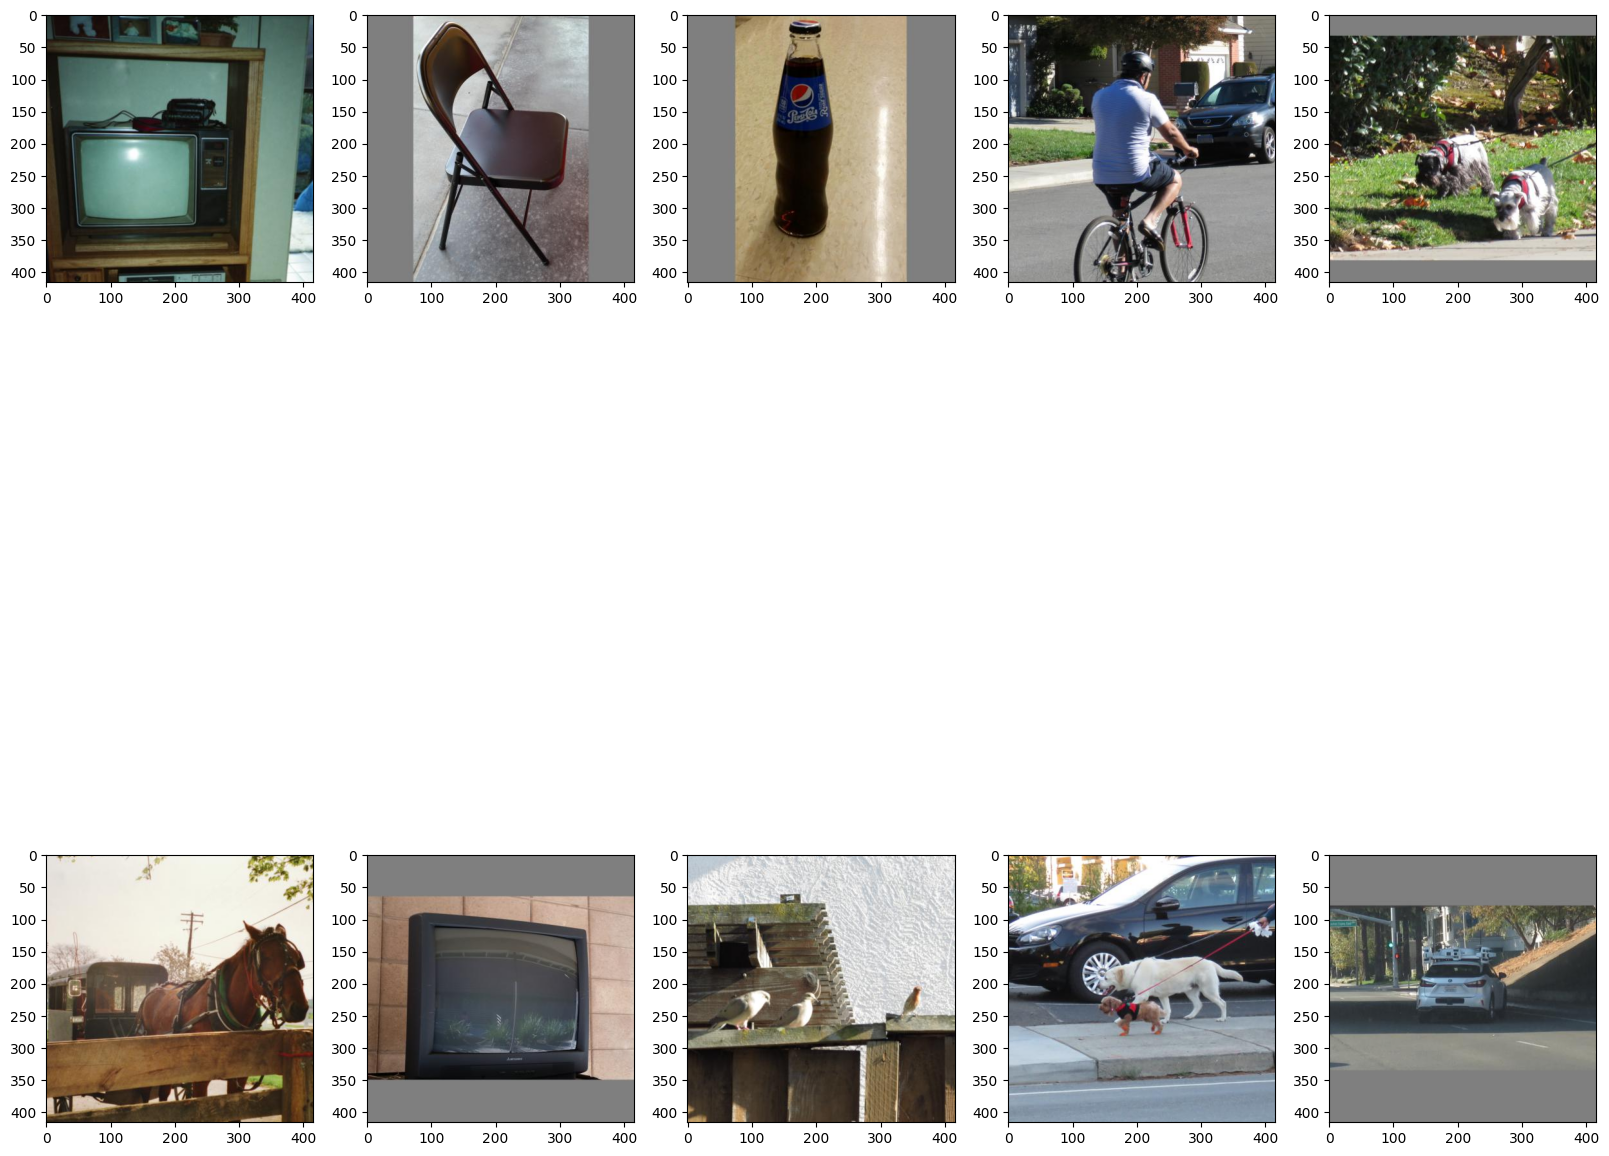

In [52]:
cnt = 0
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 20))
row = 0
col = 0
for i, ([images_array]) in enumerate(numpyIteratorPipeline, 0):
    for k in images_array:
        cnt += 1
        image = k.astype("int")
        axes[row, col].imshow(image)
        row += 1
        if row == 2:
            row = 0
            if col != 4:
                col += 1
numpyIteratorPipeline.reset()